## Assignment 7A

### Problem Details
Thermal diffusion in the Earth’s crust (FTCS).

#### Equation of Motion
$$\dfrac{\partial T}{\partial t}=D\dfrac{\partial^2 T}{\partial x^2}$$
where $D = 0.1\text{m}^2\ \text{day}^{-1}$ in this problem.

#### Boundary Conditions
$$\begin{align}
T_\text{surf}(t,0\text{m})&=A+B\sin\left(\dfrac{2\pi t}{\tau}\right)\\
T_\text{deep}(t,20\text{m})&=11^\circ C
\end{align}$$
where $\tau = 365$ days, $A = 10^\circ C$, and $B = 12^\circ C$.

#### Initial Condition
$$\begin{align}
T(x,0) &= T^0_\text{surf} + (T^0_\text{deep} − T^0_\text{surf})\dfrac{x}{20}
\end{align}$$

#### Finite Approximation of EoM
We can write the differentials as finite differences:
$$\begin{align}
\dfrac{\partial^2T}{\partial x^2}&\approx\dfrac{T(t,x+\Delta x)-2T(t,x)+T(t,x-\Delta x)}{(\Delta x)^2}\\
\dfrac{\partial T}{\partial t}&\approx\dfrac{T(t+\Delta t,x)-T(t,x)}{\Delta t}
\end{align}$$
And using the heat equation we see that:
$$\begin{align}
T(t+\Delta t,x)&\approx T(t,x)+\dfrac{D\Delta t}{(\Delta x)^2}\left[T(t,x+\Delta x)-2T(t,x)+T(t,x-\Delta x)\right]\\
\end{align}$$

#### Stability of Finite Approximation
From von Neumann analysis, we will set the constraint:
$$h\ll\dfrac{(\Delta x)^2}{2D}$$

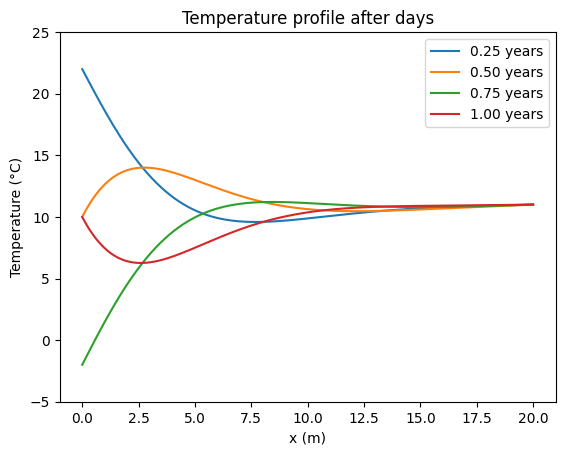

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
D = 0.1             # m^2/day
L,  Δx = 20.0, 0.1  # m
tf, Δt = 365*9, 0.01  # days

# Temperature functions
def T_deep(t_day: float) -> float:
    return 11  # °C
def T_surf(t_day: float) -> float:
    return 10 + 12 * np.sin(2 * np.pi * t_day / 365)  # °C
def T_initial(x: float) -> float:
    return T_surf(0) + (T_deep(0) - T_surf(0)) * (x / L)  # °C

# Evolution function
def evolve(T: np.ndarray, t: float, Δx: float, Δt: float) -> None:
    
    # Boundary conditions
    k: float = D * Δt / Δx**2
    T[0] = T_surf(t)
    T[-1] = T_deep(t)

    # Internal points
    if True:
        T[1:-1] += k * (T[:-2] - 2 * T[1:-1] + T[2:])  # Heat equation
    else:
        T_new = np.zeros_like(T)
        for i in range(1, len(T) - 1):
            T_new[i] = T[i] + k * (T[i - 1] - 2 * T[i] + T[i + 1])
        T[1:-1] = T_new[1:-1]
    return

# Plot the initial temperature profile
if False:
    x = np.linspace(0, L, 100)
    plt.plot(x, [T_initial(xi) for xi in x])
    plt.xlabel('x (m)')
    plt.ylabel('Temperature (°C)')
    plt.title('Initial temperature profile')
    plt.show()

# Plot the temperature profile after tf days
if True:
    x = np.arange(0, L + Δx, Δx)
    T = np.array([T_initial(xi) for xi in x])

    # Iterate to find cycle equilibrium
    for n in range(1, int(tf // Δt)+1):
        evolve(T, n*Δt, Δx, Δt)

    # Plot in 3 month intervals
    N: int = int(int(365 // Δt) // 4)
    for n in range(1, int(365 // Δt)+1):
        evolve(T, n*Δt, Δx, Δt)
        if n % N == 0:
            plt.plot(x, T, label=f'{n*Δt/365:.2f} years')

    # Universal plot settings
    plt.xlabel('x (m)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature profile after days')
    plt.ylim(-5, 25)
    plt.legend()
    plt.show()

